# Student Grade Regression - Portuguese - Data Visualization

## Import base libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data preprocessing

In [2]:
# df = pd.read_csv('student-mat.csv')  # Math class
df = pd.read_csv('student-por.csv')  # Portuguese class
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(649, 32) (649,)


In [3]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
# Identify all categorical columns
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


In [6]:
# Identify all categorical columns
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


In [7]:
# Identify all numerical columns
obj_df = df.select_dtypes(include=['int64']).copy()
obj_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


In [8]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
# Categorical Columns (indices) - 0:1, 3:5, 8:11, 15:22
from sklearn.preprocessing import LabelEncoder

# Label Encode - 0:1, 3:5, 15:22
le = LabelEncoder()
# le_columns = X[:, [0, 1, 3, 4, 5, 15, 16, 17, 18, 19, 20, 21, 22]]

# for i in X[:]:
#   if i in le_columns:
#     X[:, i] = le.fit_transform(X[:, i])

# Encode nominal attributes
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])
X[:, 8] = le.fit_transform(X[:, 8])
X[:, 9] = le.fit_transform(X[:, 9])
X[:, 10] = le.fit_transform(X[:, 10])
X[:, 11] = le.fit_transform(X[:, 11])

# Encode binary attributes
X[:, 15] = le.fit_transform(X[:, 15])
X[:, 16] = le.fit_transform(X[:, 16])
X[:, 17] = le.fit_transform(X[:, 17])
X[:, 18] = le.fit_transform(X[:, 18])
X[:, 19] = le.fit_transform(X[:, 19])
X[:, 20] = le.fit_transform(X[:, 20])
X[:, 21] = le.fit_transform(X[:, 21])
X[:, 22] = le.fit_transform(X[:, 22])

print(X)

[[0 0 18 ... 4 0 11]
 [0 0 17 ... 2 9 11]
 [0 0 15 ... 6 12 13]
 ...
 [1 0 18 ... 6 11 12]
 [1 1 17 ... 6 10 10]
 [1 1 18 ... 4 10 11]]


In [10]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
# Apply PCA (dimensionality reduction)
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

## Data Visualization

#### Age Distribution

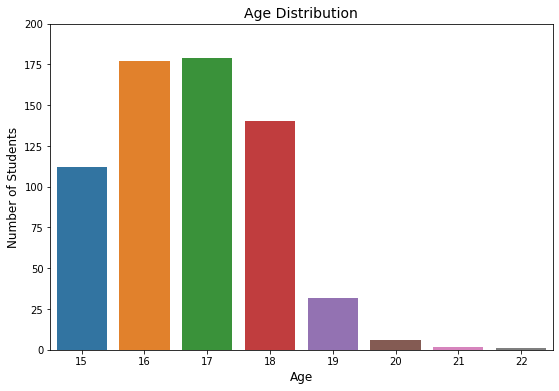

In [13]:
plt.figure(figsize=(9, 6))
age_dist = df['age']
sns.countplot(x=age_dist)
plt.yticks(np.arange(0, 225, 25))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

#### Gender Distribution

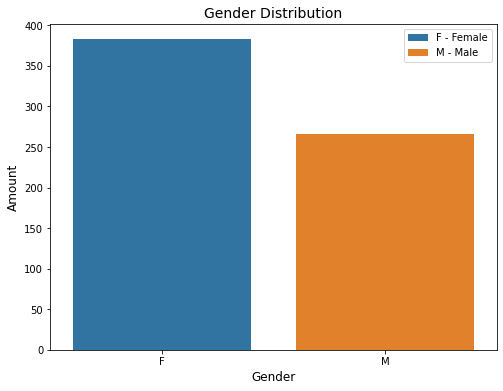

In [14]:
plt.figure(figsize=(8, 6))
gender_labels = ['F - Female', 'M - Male']
gender_dist = df['sex']
gender_plot = sns.countplot(x=df['sex'], hue=df['sex'], dodge=False)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
plt.legend(labels=gender_labels, loc='upper right')
plt.show()

#### Extracurricular Activities

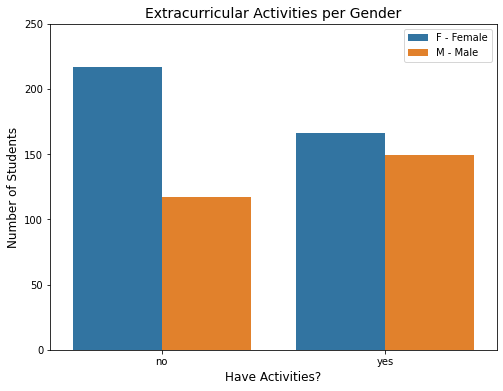

In [15]:
plt.figure(figsize=(8, 6))
activities_labels = ['No', 'Yes']
sns.countplot(x=df['activities'], hue=df['sex'], dodge=True)
plt.yticks(np.arange(0, 300, 50))
plt.xlabel('Have Activities?', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Extracurricular Activities per Gender', fontsize=14)
plt.legend(labels=gender_labels, loc='upper right')
plt.show()

#### Travel Time from Home to School

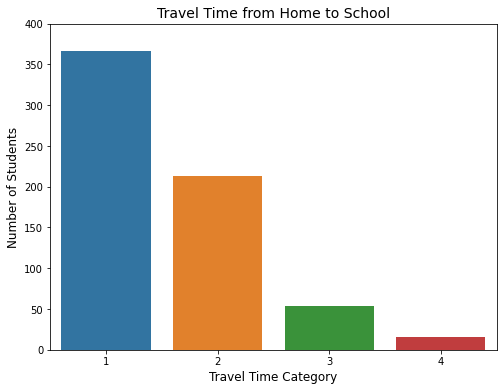

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['traveltime'])
plt.yticks(np.arange(0, 450, 50))
plt.xlabel('Travel Time Category', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Travel Time from Home to School', fontsize=14)
plt.show()

###### **Travel Time Category:**
1 = <15 minutes, 2 = 15-30 minutes, 3 = 30 minutes - 1 hour, 4 = >1 hour

#### Weekly Studying Time 

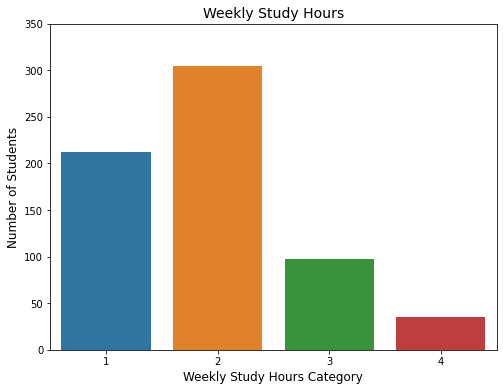

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['studytime'], dodge=True)
plt.yticks(np.arange(0, 375, 50))
plt.xlabel('Weekly Study Hours Category', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Weekly Study Hours', fontsize=14)
plt.show()

###### **Weekly Study Hours Category:**
1 = <2 hours, 2 - 2-5 hours, 3 = 5-10 hours, 4 = >10 hours

#### Number of Absences per Age

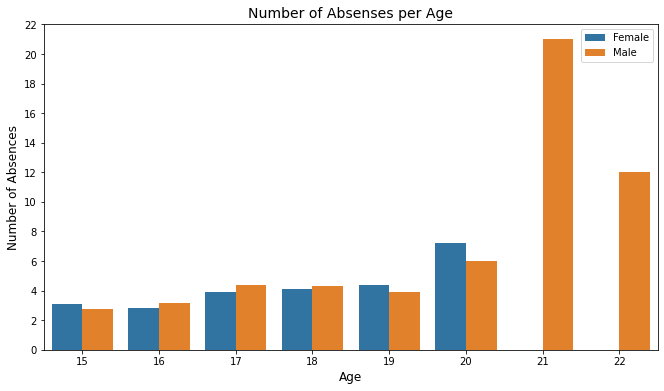

In [18]:
gender_labels_2 = ['Female', 'Male']
plt.figure(figsize=(11, 6))
sns.barplot(x=df['age'], y=df['absences'], hue=df['sex'], ci=None)
plt.yticks(np.arange(0, 24, 2))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Number of Absenses per Age', fontsize=14)
plt.legend(labels=gender_labels_2, loc='upper right')
plt.show()

#### Number of Failures per Age

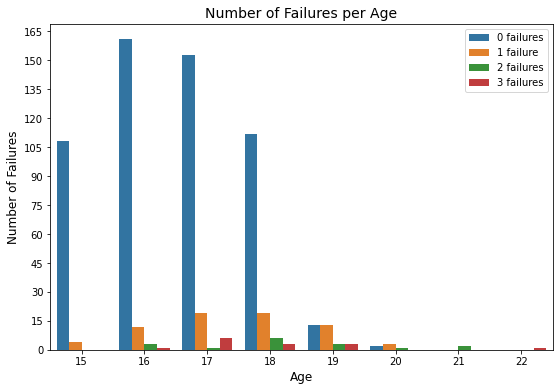

In [19]:
plt.figure(figsize=(9, 6))
failure_labels = ['0 failures', '1 failure', '2 failures', '3 failures']
sns.countplot(x=df['age'], hue=df['failures'])
plt.yticks(np.arange(0, 170, 15))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Failures', fontsize=12)
plt.title('Number of Failures per Age', fontsize=14)
plt.legend(labels=failure_labels, loc='upper right')
plt.show()

#### Grades Distribution

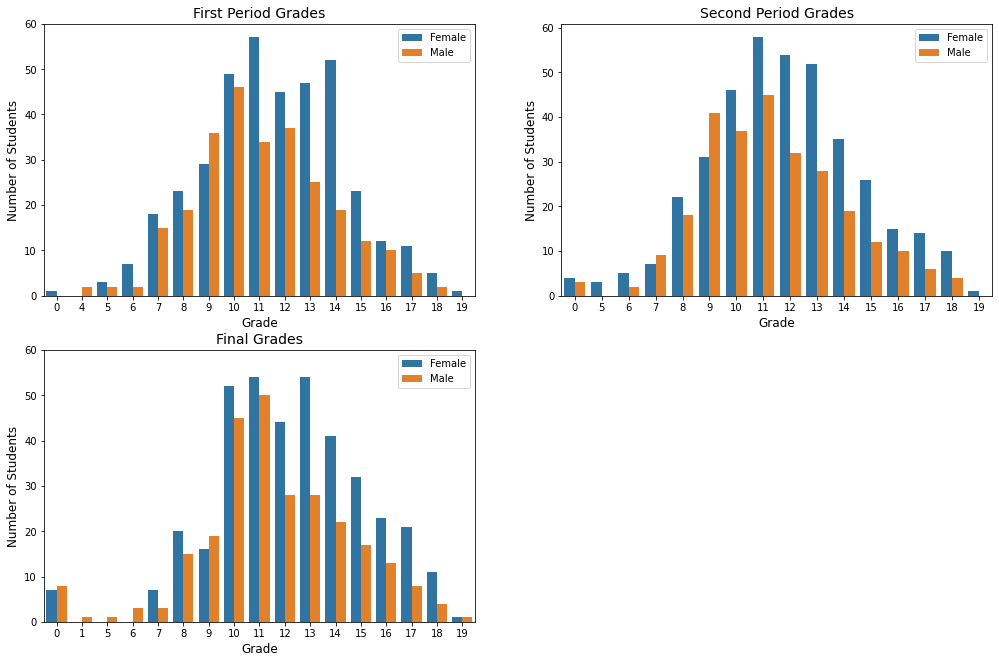

In [20]:
# First period grades
fig1 = plt.figure(figsize=(17, 11))
ax1 = fig1.add_subplot(2, 2, 1)
ax1 = sns.countplot(x=df['G1'], hue=df['sex'])
plt.yticks(np.arange(0, 70, 10))
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('First Period Grades', fontsize=14)
plt.legend(labels=gender_labels_2, loc='upper right')

# Second period grades
ax2 = fig1.add_subplot(2, 2, 2)
ax2 = sns.countplot(x=df['G2'], hue=df['sex'])
plt.yticks(np.arange(0, 70, 10))
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Second Period Grades', fontsize=14)
plt.legend(labels=gender_labels_2, loc='upper right')

# Final grades
ax3 = fig1.add_subplot(2, 2, 3)
ax3 = sns.countplot(x=df['G3'], hue=df['sex'])
plt.yticks(np.arange(0, 70, 10))
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Final Grades', fontsize=14)
plt.legend(labels=gender_labels_2, loc='upper right')

plt.show()

#### Correlation Map

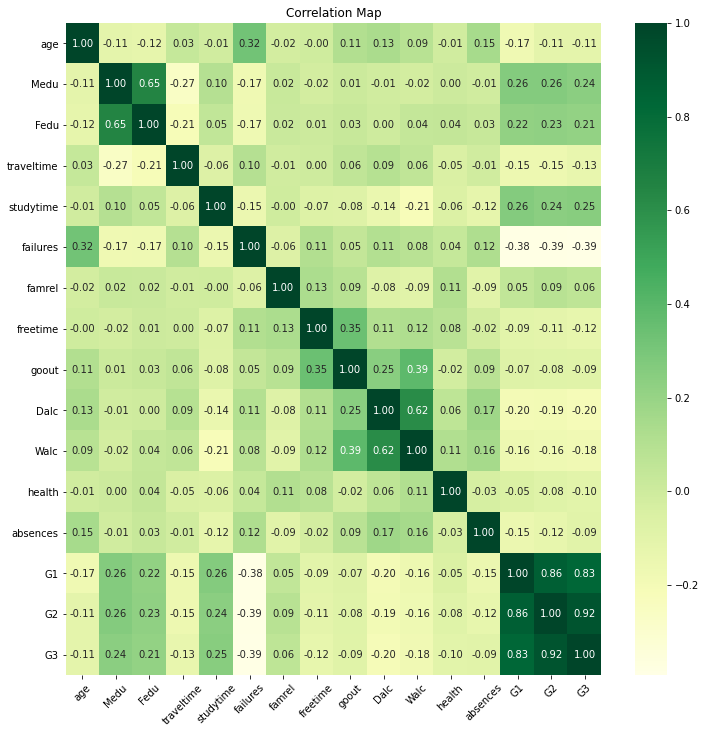

In [21]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='YlGn', annot=True, fmt = ".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()